Suppose there is a road which has an unusually high number of car accidents one year. We put up a speed camera in the hopes it will reduce the number of accidents, and the next year the number of accidents goes down. The camera worked! Or did it?

To illustrate the problem, some blobs are playing high jump! Blobs can usually jump about 1m, but sometimes they do a bit better and sometimes they do a bit worse. We'll model this as a gaussian with mean 1 and standard deviation 0.1. After each blob jumps, they'll be "praised" if they exceed 1.2m, and "shamed" if they fall below 0.8m. This of course has no effect on their performance, it's still gauss(1, 0.1). But it will look like the blobs get worse if you praise them and better if you shame them!

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
r.seed(1)

Mean change after praise: -0.1835
Mean change after shame: 0.2306


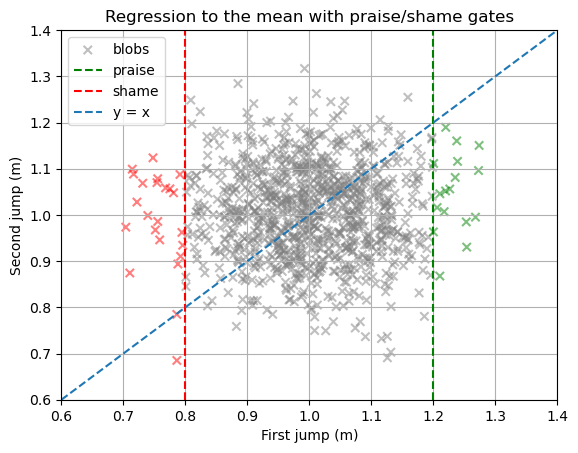

In [2]:
nBlobs = 1000
mean = 1.0
std = 0.1
praise = 1.2
shame = 0.8

def jump():
    return(r.gauss(mean, std))

firstJump = [jump() for i in range(nBlobs)]
labels = [1 if x > praise else (-1 if x < shame else 0) for x in firstJump]
secondJump = [jump() for i in range(nBlobs)]
differencePraise = [i for i, z in enumerate(labels) if z == 1]
differenceShame = [i for i, z in enumerate(labels) if z == -1]
effectPraise = np.mean([secondJump[i] - firstJump[i] for i in differencePraise]) if len(differencePraise) > 0 else float("nan")
effectShame = np.mean([secondJump[i] - firstJump[i] for i in differenceShame]) if len(differenceShame) > 0 else float("nan")

print(f"Mean change after praise: {effectPraise:.4f}")
print(f"Mean change after shame: {effectShame:.4f}")

colors = ["green" if z == 1 else ("red" if z == -1 else "gray") for z in labels]
plt.scatter(firstJump, secondJump, c = colors, alpha = 0.5, marker = "x", label = "blobs")
x = np.linspace(0.5, 1.5, 200)
plt.axvline(praise, linestyle = "--", label = "praise", color = "Green")
plt.axvline(shame, linestyle = "--", label = "shame", color = "Red")
plt.plot(x, x, linestyle = "--", label = "y = x")
plt.xlabel("First jump (m)")
plt.ylabel("Second jump (m)")
plt.title("Regression to the mean with praise/shame gates")
plt.xlim(0.6, 1.4)
plt.ylim(0.6, 1.4)
plt.legend()
plt.grid(True)
plt.show()

It looks like our shaming increases blob performance by around 0.2m and praising decreases it by around 0.2m, but of course this is an illusion! It's just that if your last jump was unusually poor, your next will probably be better, and if your last jump was unusually good, your next will probably be worse.

Similarly for our speed camera, even if it has absolutely no effect on the rate of accidents, the reason we put it up was the abnormally high number of accidents in the previous year, so of course we'll have fewer accidents this year.